# Exploration of the powercreep phenomen within the first 8 generation of pokemon

## Project Background

This project is centered around the exploration of 'pokemon.csv' which is a dataset detailing critical information regarding its first 8 generations of characters.

The aim is to explore 'power creep' theories across generations, that is that newer generations tend to introduce 'stronger' pokemon.

*It must also be said that Pokemmon as a whole is difficult to analyze in terms of true strendth since stats alone do not define power but a combination of movesets, abilities, and typings. This project will only focus on the trends of numerical stats which define pokemmon that is (hp, attack, defense, special attack, special defense, and speed). Also various generations introduce gimmicks which empower a subset of characters so we will be ignoring these entries as they would not exsist across generations*

### Setup

In [1]:
# import libaries we will be using
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
# display charts correctly
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 75

In [3]:
# import raw data 'pokemon.csv'
pokemon_raw = pd.read_csv("pokemon.csv")
pokemon_raw.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [4]:
# cleans data for first instance of each pokemon (number), also create a separate data instance w/o legendaries
unique_pokemon = pokemon_raw.drop_duplicates(subset='number')
non_legendary = unique_pokemon[unique_pokemon['legendary'] == False]

## Exploration of Data

### Total stat trends throughout generations

To start we'll look into the total stats distribution across each generation. Well also choose to display the change in the average value for that generation from one generation to the other.

Also given that legendaries are inherently introduced with stats much higher than the population well also reerun the plots without the presence of these generational legendaries.

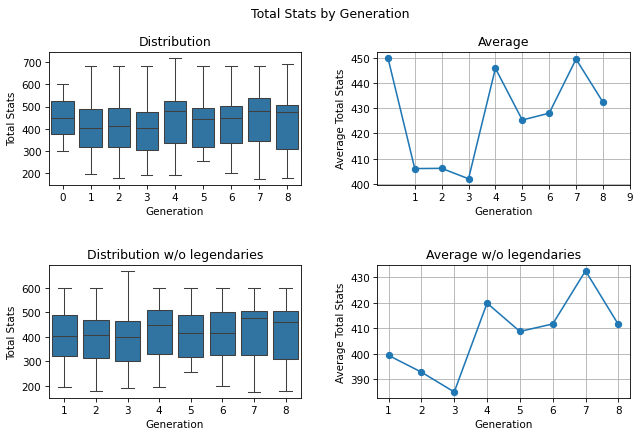

In [5]:
plt.suptitle('Total Stats by Generation')

# Box plot to show distribution of 'total' for each generation
plt.subplot(2,2,1)
sns.boxplot(x='generation', y='total', data=unique_pokemon)
plt.title('Distribution')
plt.xlabel('Generation')
plt.ylabel('Total Stats')

# Line chart to show average 'total' for each generation
average_total_per_gen = unique_pokemon.groupby('generation')['total'].mean()

plt.subplot(2,2,2)
plt.plot(average_total_per_gen, marker='o')
plt.title('Average')
plt.xlabel('Generation')
plt.ylabel('Average Total Stats')
plt.xticks(range(1, unique_pokemon['generation'].nunique() + 1))  # Set x-ticks to integer generations
plt.grid()

# Box plot to show distribution of 'total' for each generation w/o legendary
plt.subplot(2,2,3)
sns.boxplot(x='generation', y='total', data=non_legendary)
plt.title('Distribution w/o legendaries')
plt.xlabel('Generation')
plt.ylabel('Total Stats')

# Line chart to show average 'total' for each generation w/o legendary
average_total_per_gen_non_leg = non_legendary.groupby('generation')['total'].mean()

plt.subplot(2,2,4)
plt.plot(average_total_per_gen_non_leg, marker='o')
plt.title('Average w/o legendaries')
plt.xlabel('Generation')
plt.ylabel('Average Total Stats')
plt.xticks(range(1, non_legendary['generation'].nunique() + 1))  # Set x-ticks to integer generations
plt.grid()

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.savefig("total_stats_by_generation.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

***Analysis*** The graphs show no distinct trend, rather appearing as a random shift in value from one generation to another when including the entire libary; this is only enforced by the chance in the generation average. When ignoring pokemon of legendary status the graphs have a slight uptrend but not signigicant enough to properly enforce the idea of a strong uptrend from generation to generation.

### Generational trend by distinct typing

Next we'll explore the generational trends for each typing. Because we can have dual types they will be included in each of its type plots. Well also have to take caution in that there some types may not have many entries in a generation as well find with types like 'dark'

Well first fetch the typings and create boxplots for each generation. Well also graph them on the same incriments to best visualize trends

In [6]:
# fetches all pokemon types (verifiable from a quick internet search)
poke_types = np.delete(pokemon_raw['type1'].unique(),[3,19]) # Some errors in the original csv means dropping 2 values
print(poke_types)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon'
 'Flying']


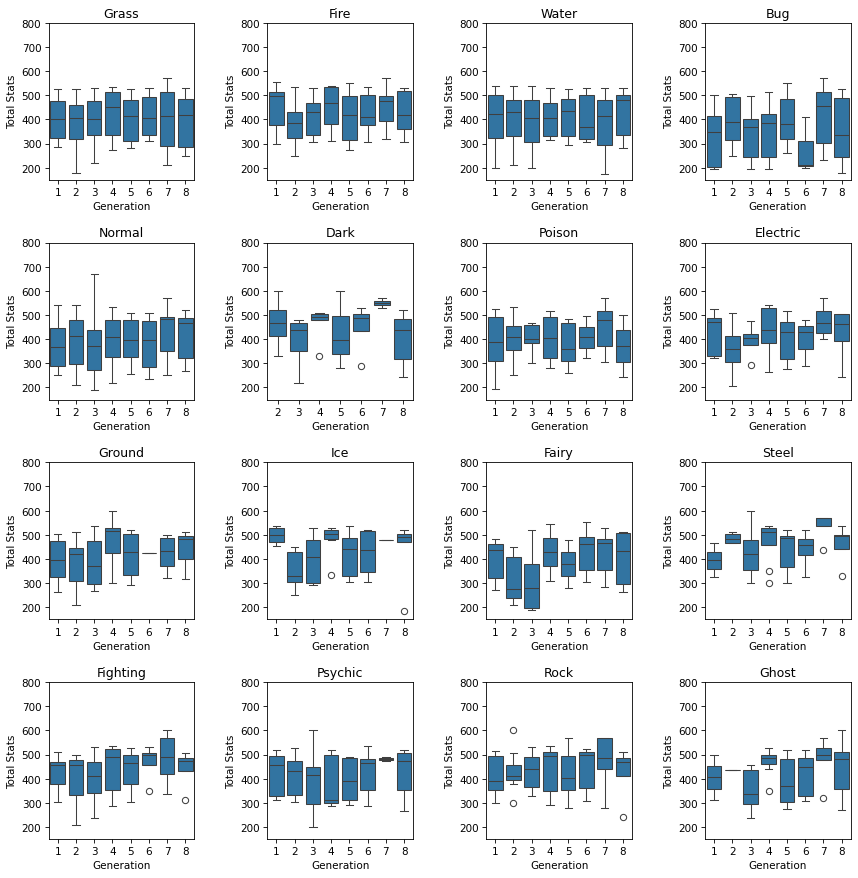

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.tight_layout(pad=3.0)  # Add padding around subplots

# Box plot to show distribution of 'total' for each generation
for i in range(1,17):
    plt.subplot(4,4,i)
    typei = poke_types[i - 1]
    i_type_poke = non_legendary[(non_legendary['type1'] == typei) | (non_legendary['type2'] == typei)]
    sns.boxplot(x='generation', y='total', data=i_type_poke)
    plt.title('{type}'.format(type = typei))
    plt.xlabel('Generation')
    plt.ylabel('Total Stats')
    plt.ylim(150,800)

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.savefig("total_stats_by_generation_types.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

***Analysis*** In plotting the distribution of total stats for each type across the generations we see a degree of randomness although we may be able to point to a lack of extensive data as the fault. In those with more data we get a clearer picture but aren't able to read out a clear perceptable trend.

### Generational trend by single or dual typings

Before we explore whether there is true randomness in our data we will explore how having a single or dual type play into total stat distribution across the generations.

In [8]:
# Adds a new column which defines if a pokemon is single or dual typing (whether it has a type2)
non_legendary['typing'] = np.where(non_legendary['type2'].isna(), 'Single', 'Dual')

C:\Users\justi\AppData\Local\Temp\ipykernel_5072\3445495545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_legendary['typing'] = np.where(non_legendary['type2'].isna(), 'Single', 'Dual')


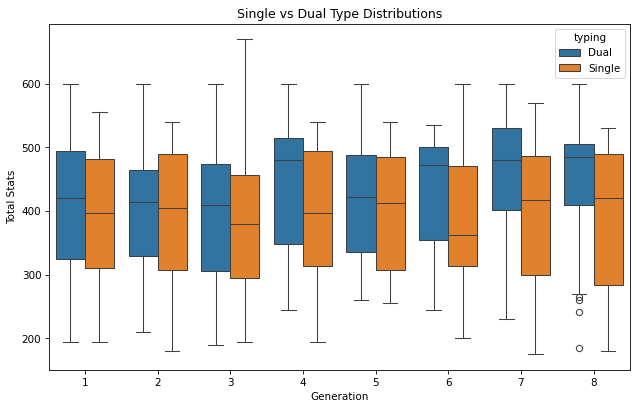

In [9]:
# Box plot to show distribution of 'total' for each generation (single vs dual type)
sns.boxplot(x='generation', y='total', data=non_legendary, hue='typing')
plt.title('Single vs Dual Type Distributions')
plt.xlabel('Generation')
plt.ylabel('Total Stats')
plt.savefig("single_vs_dual_type_distribution.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
type_counts = non_legendary.groupby(['generation','typing']).size().unstack(fill_value=0).reset_index()
type_counts.head()

typing,generation,Dual,Single
0,1,64,82
1,2,46,48
2,3,62,63
3,4,49,44
4,5,62,81


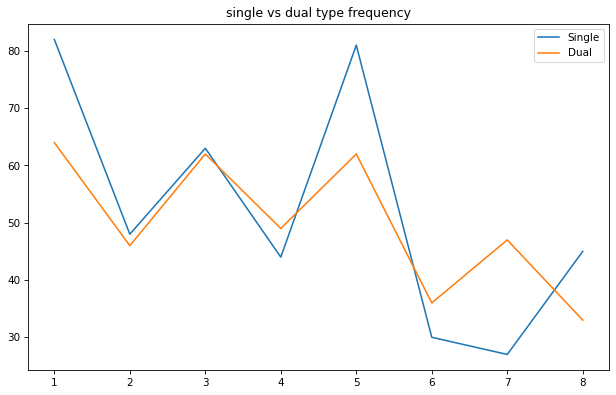

In [11]:
plt.plot(type_counts['generation'],type_counts['Single'], label='Single')
plt.plot(type_counts['generation'],type_counts['Dual'], label='Dual')
plt.legend()
plt.title("single vs dual type frequency")
plt.savefig("single_dual_type_frequency.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

***Analysis*** Here we have a pretty clear picture/trend in which later generations of dual types have not only a more compact distribution of total stats but a larger numerical value. We also tried to see if this was a fault of having a higher quantity of dual types in comparison to single types but didn't see evidence of this divide with nearing similar numbers. Although, with greater context of the franchise we may be able to tie a partial cause of this trend to how dual types are more evident in late-stage evolutions which are inherinty stronger.

### Hypothesis Testing

You will remember that at the beggining of our exploration of data we analyzed the distribution of stats across the generations, visually there is no strong evidence to point towards this apparent upward growth in power. To define whether there is a significant difference in total stats across generations we will administer an ANOVA hypothesis test

In [12]:
# Perform a one-way ANOVA test
anova_result = stats.f_oneway(*(non_legendary[non_legendary['generation'] == gen]['total'] for gen in np.arange(1,9)))

# Display the result
print("ANOVA Test Results")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

ANOVA Test Results
F-statistic: 2.243704438111558
p-value: 0.02899505746644113


## Conclusion

Our test has shown that the newer generations of pokemon have a tendency to introduce stronger pokemon (on a strictly total stats basis). Additionally with the analysis we did on finding trends in relation to typings or rather the presence of single vs dual types, alongide additional context of game mechanics and general tendecies. We can presume that this uptake is in part due to how dual types skew the distributions and trends especially since they tend to be more prevalent in the later stage of evolutions which themselves are inheriently stronger. As a matter of fact with the context in mind we could strongly conclude that new generations of pokemon tend to have few multistage pokemon, that is pokemon that can evolve. 

With additional data we could help to prove this point but that is outside of the scope of what we can do here and now atleast without extensive work being done on the raw table.